In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys
from pprint import pprint

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("[setup]: determining CUDA support...")
print("PyTorch version:", torch.__version__)
print("Torchaudio version:", torchaudio.__version__)
print("CUDA is available:", torch.cuda.is_available())


[setup]: determining CUDA support...
PyTorch version: 2.0.1+cu118
Torchaudio version: 2.0.2+cu118
CUDA is available: True


In [14]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./data", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

labels = sorted(list(set(datapoint[2] for datapoint in train_set)))

(tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]),
 16000,
 'backward',
 '0165e0e8',
 0)


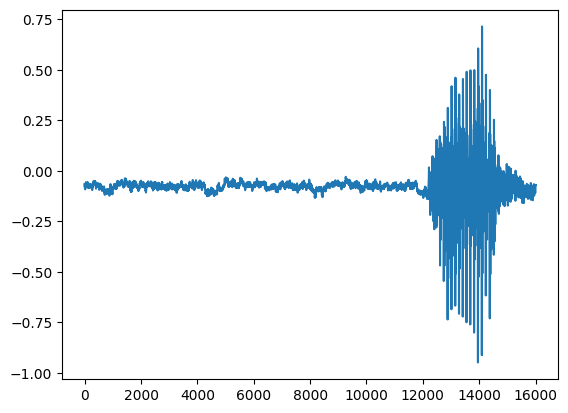

In [15]:
pprint(train_set[0])
waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]
plt.plot(waveform.t().numpy())

In [16]:
waveform_first, *_ = train_set[0]
ipd.Audio(waveform_first.numpy(), rate=sample_rate)